# Import

In [2]:
import numpy as np
import pandas as pd
import copy
from scipy import stats

# Load data

In [3]:
data = pd.read_csv('used_cars.csv')
df_used_cars = copy.deepcopy(data)
df_used_cars.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Check and Removing Duplicated and drop it**

In [ ]:
data = {'A': [1, 2, 2, 3], 'B': [4, 5, 5, 6]}
df = pd.DataFrame(data)
df

,A,B
0,1,4
1,2,5
2,2,5
3,3,6


### Check Duplicates

In [ ]:
df.duplicated().sum()

1

### Removing Duplicates

In [ ]:
cleaned_df = df.drop_duplicates()
cleaned_df

,A,B
0,1,4
1,2,5
3,3,6


# Data Cleaning

## Removing Missing Values

In [4]:
data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,4.0
1,2.0,NaN
2,NaN,6.0


In [5]:
cleaned_df = df.dropna()
cleaned_df

,A,B
0,1.0,4.0


## Filling Missing Values without models

In [9]:
data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)
df

,A,B
0,1.0,4.0
1,2.0,NaN
2,NaN,6.0


In [10]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("\nColumns with missing values:")
print(missing_columns)


Columns with missing values:
['A', 'B']


### Fill with a constant value

In [12]:
constant_value = 0
df_constant = df.fillna(0)
print(f"\nDataFrame after filling missing values with {constant_value}:")
df_constant


DataFrame after filling missing values with 0:


,A,B
0,1.0,4.0
1,2.0,0.0
2,0.0,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Fill with the mean value

In [14]:
df_mean = df.fillna(df.mean())
print("\nDataFrame after filling missing values with mean:")
df_mean


DataFrame after filling missing values with mean:


,A,B
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Fill with the median value

In [15]:
df_median = df.fillna(df.median())
print("\nDataFrame after filling missing values with median:")
df_median


DataFrame after filling missing values with median:


,A,B
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Fill with the most frequent value (mode)

In [24]:
df_mode = df.apply(lambda x: x.fillna(x.mode()[0]), axis=0)
print("\nDataFrame after filling missing values with mode:")
df_mode


DataFrame after filling missing values with mode:


,A,B
0,1.0,4.0
1,2.0,4.0
2,1.0,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Forward fill (using the previous value)

In [25]:
df_ffill = df.ffill()
print("\nDataFrame after forward fill:")
df_ffill


DataFrame after forward fill:


,A,B
0,1.0,4.0
1,2.0,4.0
2,2.0,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Backward fill (using the next value)

In [26]:
df_ffill = df.bfill()
print("\nDataFrame after forward fill:")
df_ffill


DataFrame after forward fill:


,A,B
0,1.0,4.0
1,2.0,6.0
2,NaN,6.0


### *------------------------------------------------------------------------------------------------------------------*

### Interpolation (linear)

In [27]:
df_interpolate = df.interpolate()
print("\nDataFrame after interpolation:")
df_interpolate


DataFrame after interpolation:


,A,B
0,1.0,4.0
1,2.0,5.0
2,2.0,6.0


### *------------------------------------------------------------------------------------------------------------------*

## Filling Missing Values with models

### Simple Imputer
SimpleImputer replaces missing values using a specified strategy. Common strategies include:

- Mean: Replaces missing values with the mean of the column.
- Median: Replaces missing values with the median of the column.
- Most Frequent: Replaces missing values with the most frequent value in the column.
- Constant: Replaces missing values with a constant value provided by the user.

#### Best Use Cases:

- When the data distribution is simple.
- When computational simplicity and speed are needed.
- When missing values are not related to other features.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
imputed_df

,A,B
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


### K-Nearest Neighbors Imputer
KNNImputer uses the k-nearest neighbors approach to impute missing values. It replaces missing values using the mean (or other specified aggregation function) of the nearest k-neighbors found in the dataset.

#### Best Use Cases:

- When the data distribution is more complex.
- When there is an inherent relationship between features.
- When accuracy is more critical than computational efficiency.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)

In [ ]:
imputer = KNNImputer(n_neighbors=2)
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
imputed_df

,A,B
0,1.0,4.0
1,2.0,5.0
2,1.5,6.0


### Iterative Imputer
The IterativeImputer models each feature with missing values as a function of other features in a round-robin fashion. It uses multivariate imputation by chaining equations and works by modeling missing data points as a function of other features using Bayesian Ridge Regression (or other specified regressors).

#### Best Use Cases:

- When there are complex relationships between features.
- When the dataset is large enough to justify the computational cost.
- When the distribution of missing values is not random (MCAR) but can be explained by other features (MAR).

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd
import numpy as np

# Example DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [1, np.nan, 3, 4, 5],
    'D': [1, 2, 3, 4, np.nan]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,NaN,1.0,1.0
1,2.0,2.0,NaN,2.0
2,NaN,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,NaN


In [ ]:
# Iterative Imputer
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
imputed_df

,A,B,C,D
0,1.0,1.000038,1.000000,1.000000
1,2.0,2.000000,1.999993,2.000000
2,3.0,3.000000,3.000000,3.000000
3,4.0,4.000000,4.000000,4.000000
4,5.0,5.000000,5.000000,5.000006


## Comparison

- SimpleImputer is faster and simpler to implement.
- KNNImputer can provide more accurate imputations, especially when there is a relationship between features, but it is computationally more expensive.
- IterativeImputer is more sophisticated and often more accurate in imputing missing values compared to SimpleImputer and KNNImputer.
- IterativeImputer can leverage the information from all features to impute missing values, making it more suitable for datasets where feature interactions are complex.

### *------------------------------------------------------------------------------------------------------------------*

# Check Outliers

In [38]:
outliers_df = df_used_cars.drop(df_used_cars.select_dtypes(exclude=['int64', 'float64']).columns.tolist(),axis=1)
# Calculate the first and third quartiles of the data
q1, q3 = np.percentile(outliers_df, [25, 75])

# Calculate the IQR
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = (outliers_df < lower_bound) | (outliers_df > upper_bound)

# Print the outliers
outliers_df[outliers].count()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
diesel               0
gas                  0
dtype: int64

In [39]:
from typing import (Any, Union, List, Optional, Dict, Tuple, Literal)
import seaborn as sns
import matplotlib.pyplot as plt
import random

def box_plot_seaborn(
    data, x: Optional[str] = None, y: Optional[str] = None, hue: Optional[str] = None, 
    palette: str = 'magma',palette2: str = 'viridis',color=None, figsize: tuple = (8, 6), width: float = 0.5, whis: float = 1.5, 
    notch: bool = True, showmeans: bool = True, mean_marker: str = 'o', mean_color: str = 'black', 
    flier_marker: str = 'o', flier_size: int = 8, flier_color: str = 'black', flier_edge_color: str = 'purple', 
    xlabel: str = 'Groups', ylabel: str = 'Values', title: str = 'Box Plot (Seaborn)', 
    xtick_labels: Optional[List[str]] = None, font_scale: float = 1, orient: Optional[Literal['v', 'h', 'x', 'y']] = None
) -> None:
    """
    Create a box plot using Seaborn with the provided parameters.

    Parameters:
    - data: DataFrame
        The dataset for plotting.
    - x: str, optional
        Column name for x-axis variable.
    - y: str, optional
        Column name for y-axis variable.
    - hue: str, optional
        Column name for grouping variable to produce multiple plots.
    - palette: str
        Color palette for the plot.
    - figsize: tuple
        Size of the figure (width, height).
    - width: float
        Width of the box in the boxplot.
    - whis: float
        Whisker length in terms of IQR.
    - notch: bool
        Whether to draw a notch to indicate the confidence interval.
    - showmeans: bool
        Whether to show the mean value in the plot.
    - mean_marker: str
        Marker style for the mean value.
    - mean_color: str
        Color of the mean marker.
    - flier_marker: str
        Marker style for outliers.
    - flier_size: int
        Size of the outlier markers.
    - flier_color: str
        Color of the outlier markers.
    - flier_edge_color: str
        Edge color of the outlier markers.
    - xlabel: str
        Label for the x-axis.
    - ylabel: str
        Label for the y-axis.
    - title: str
        Title of the plot.
    - xtick_labels: list of str, optional
        Custom labels for the x-axis ticks.
    - font_scale: float
        Scaling factor for the font size of all text elements.
    - orient: {'v', 'h', 'x', 'y'}, optional
        Orientation of the plot (vertical or horizontal).
    
    Returns:
    - None
    """

    # Set font scale for all text elements and styling
    sns.set(font_scale=font_scale, style='white')

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # get the color for each plot
    if color is None:
        colors_list = random.sample(sns.color_palette(palette) + sns.color_palette(palette2), 12)
        colors = random.choices(colors_list, k=1)
    else:
        colors = color
    
    # Create the boxplot with the specified parameters
    if hue is not None:
        sns_plot = sns.boxplot(
            data=data, x=x, y=y, hue=hue, palette=palette, width=width, 
            whis=whis, notch=notch, showmeans=showmeans, orient=orient,
            meanprops=dict(marker=mean_marker, markerfacecolor=mean_color, markeredgecolor=mean_color),
            flierprops=dict(marker=flier_marker, markersize=flier_size, 
                            markerfacecolor=flier_color, markeredgecolor=flier_edge_color),
            ax=ax
        )
    elif hue is None and x is None and y is None:
        sns_plot = sns.boxplot(
            data=data, palette=palette, width=width, 
            whis=whis, notch=notch, showmeans=showmeans, orient=orient,
            meanprops=dict(marker=mean_marker, markerfacecolor=mean_color, markeredgecolor=mean_color),
            flierprops=dict(marker=flier_marker, markersize=flier_size, 
                            markerfacecolor=flier_color, markeredgecolor=flier_edge_color),
            ax=ax
        )
    elif hue is None:
        sns_plot = sns.boxplot(
            data=data, x=x, y=y, color=colors[0], width=width, 
            whis=whis, notch=notch, showmeans=showmeans, orient=orient,
            meanprops=dict(marker=mean_marker, markerfacecolor=mean_color, markeredgecolor=mean_color),
            flierprops=dict(marker=flier_marker, markersize=flier_size, 
                            markerfacecolor=flier_color, markeredgecolor=flier_edge_color),
            ax=ax
        )
    
    
    # Set labels and title
    ax.set_xlabel(xlabel, fontsize=14 * font_scale)
    ax.set_ylabel(ylabel, fontsize=14 * font_scale)
    ax.set_title(title, fontsize=16 * font_scale)

    # Set custom x-axis tick labels if provided
    if xtick_labels:
        ax.set_xticks(range(len(xtick_labels)))
        ax.set_xticklabels(xtick_labels, fontsize=12 * font_scale)

    # Set y-axis tick font size
    ax.tick_params(axis='y', labelsize=12 * font_scale)

    # Add grid lines to the plot
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Add a legend if a hue is used and there are labeled artists
    if hue and sns_plot.get_legend_handles_labels()[0]:
        ax.legend(title=hue, loc='upper right', fontsize=10 * font_scale)
    elif hue:
        print(f"Note: No legend created as no artists with labels were found for hue '{hue}'.")

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()



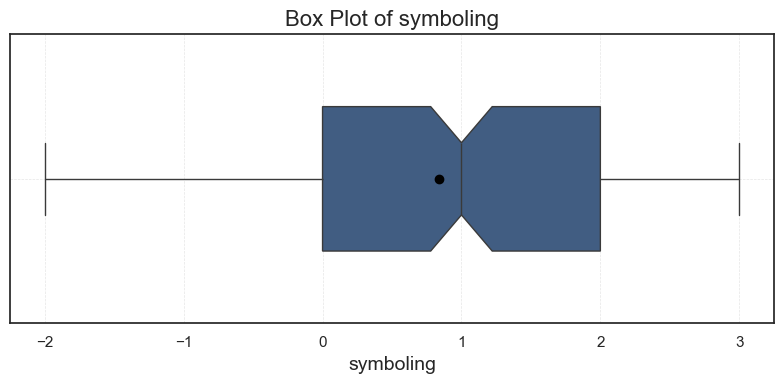

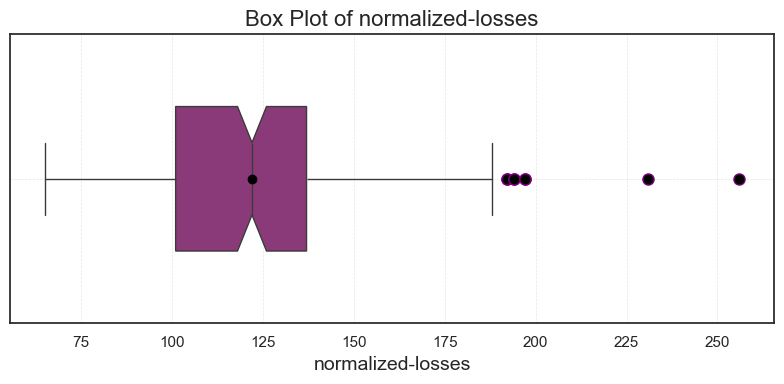

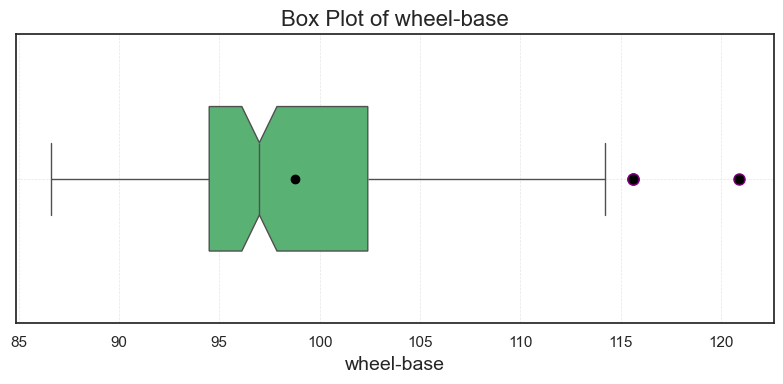

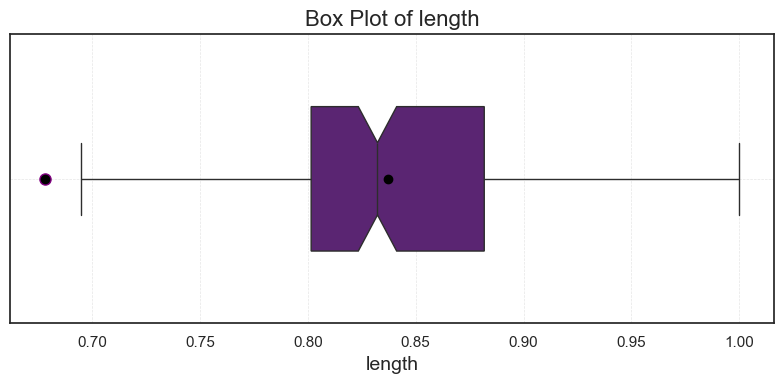

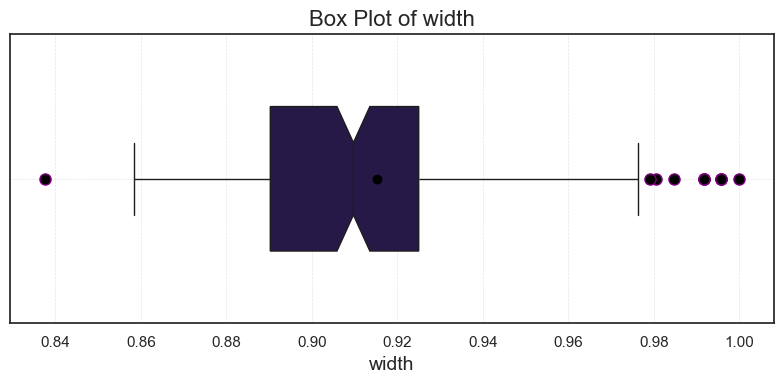

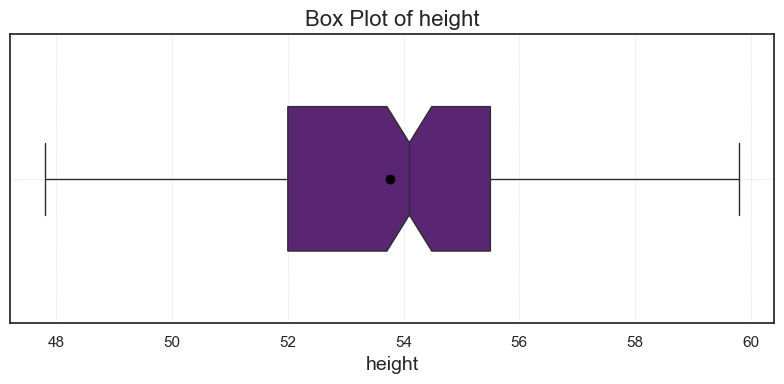

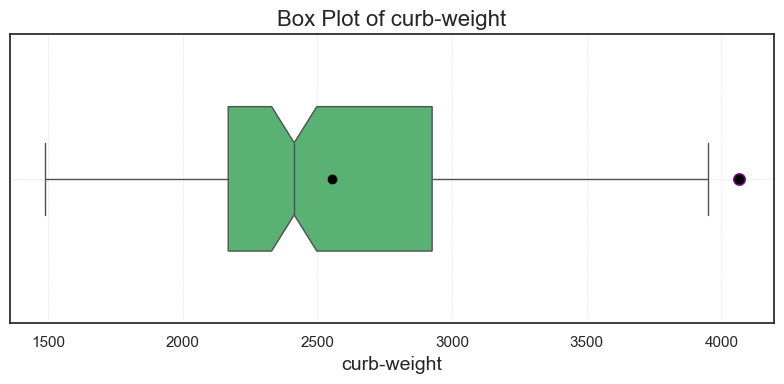

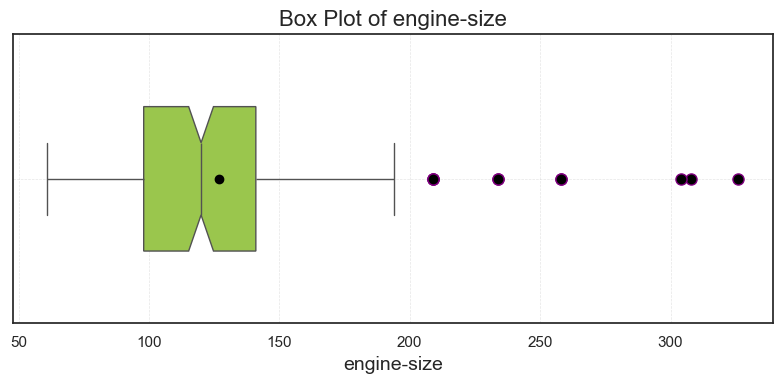

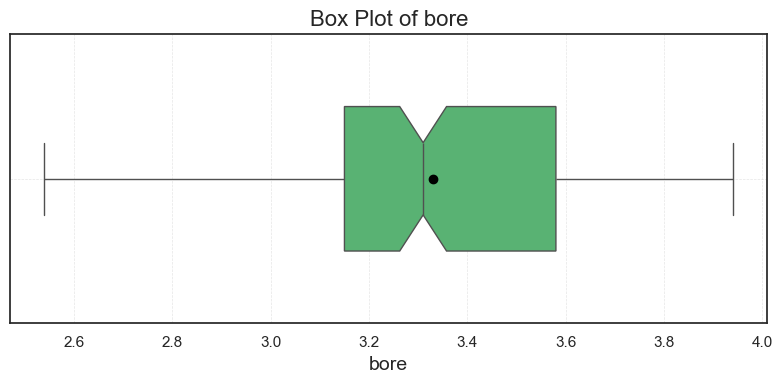

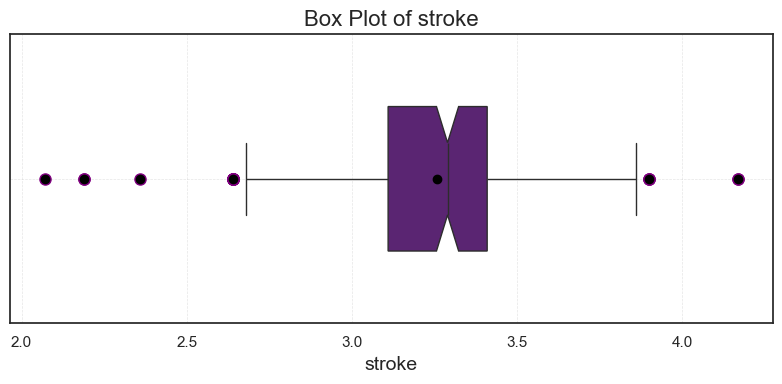

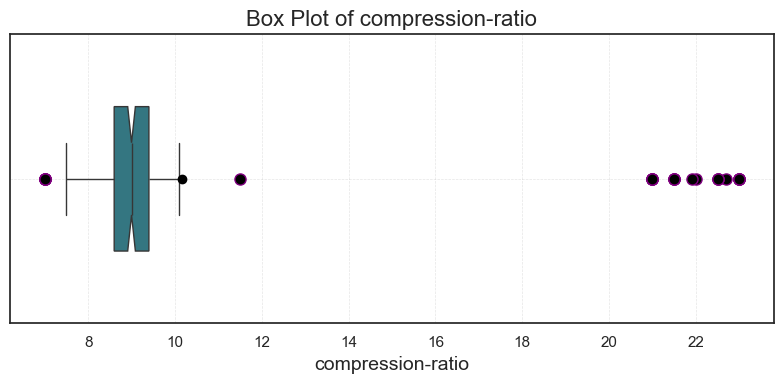

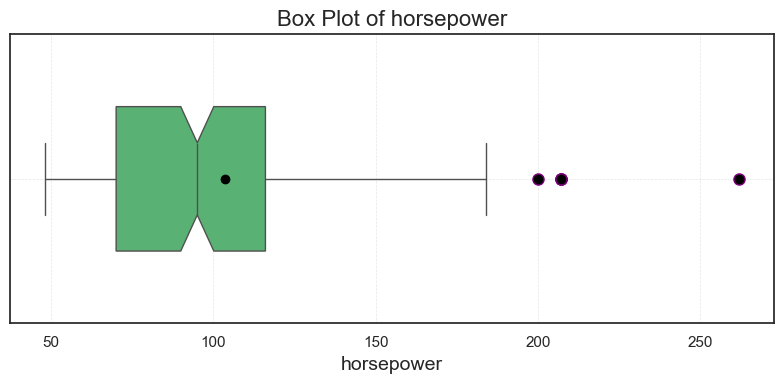

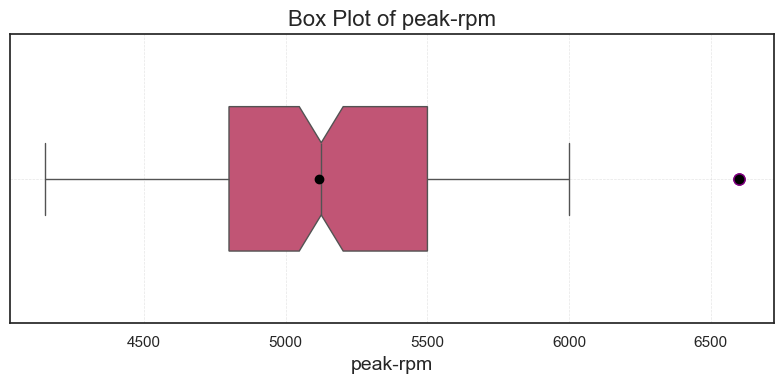

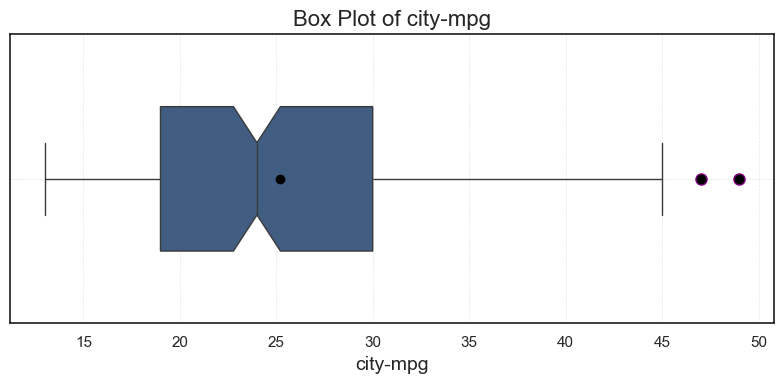

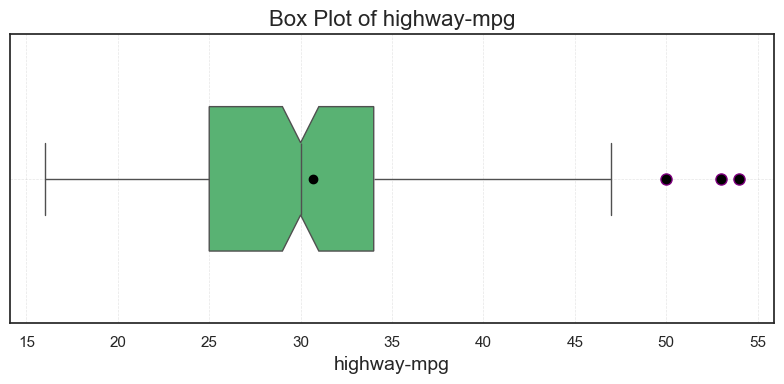

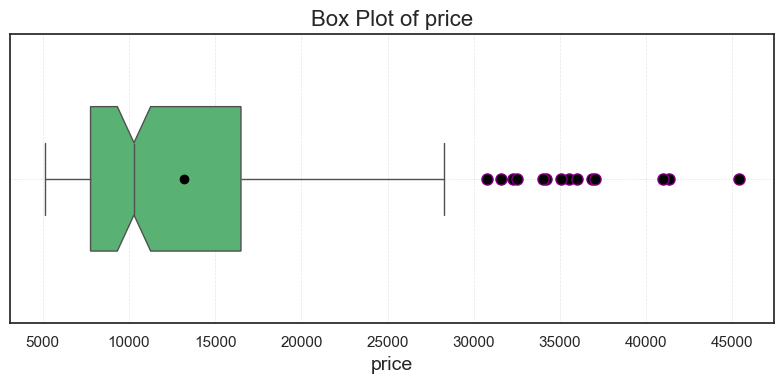

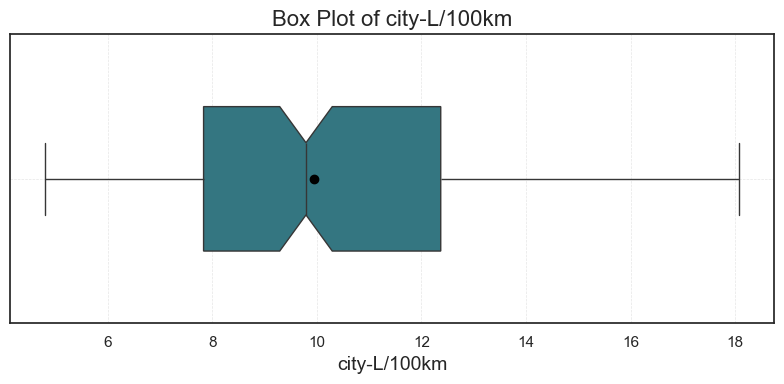

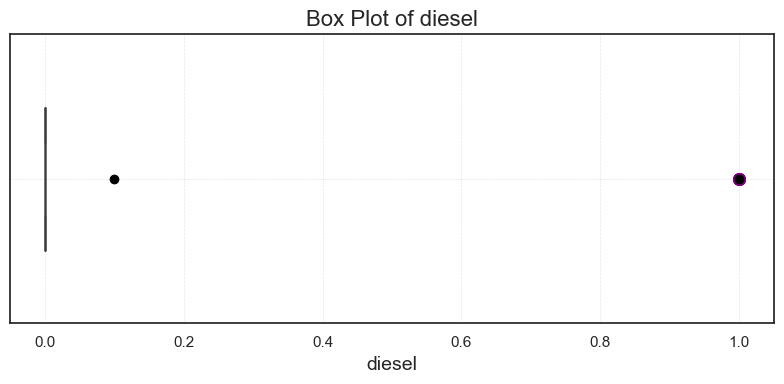

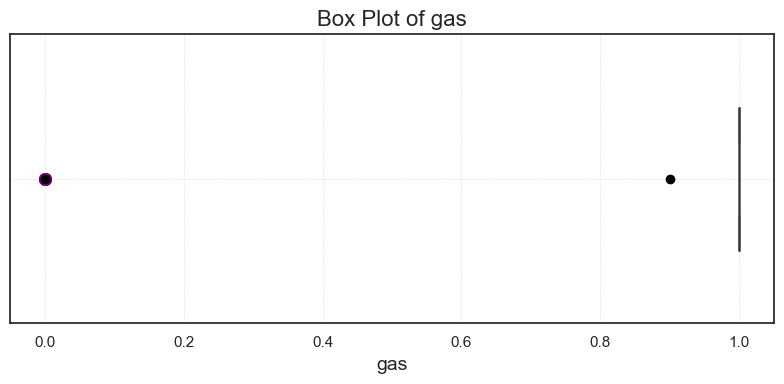

In [40]:
for coloum in outliers_df:
    box_plot_seaborn(data=df_used_cars,x=coloum,orient='y',xlabel=coloum,ylabel=None,title='Box Plot of '+coloum ,figsize=(8,4))

# Data Transformation (Scaling)

## standardization (Z-score normalization)**

In [338]:
from sklearn.preprocessing import StandardScaler
data = [[0,61],[0,62],[1,63],[1,64]]
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.        , -1.34164079],
       [-1.        , -0.4472136 ],
       [ 1.        ,  0.4472136 ],
       [ 1.        ,  1.34164079]])

### *------------------------------------------------------------------------------------------------------------------*

In [339]:
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [340]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,A,B
0,-1.341641,-1.341641
1,-0.447214,-0.447214
2,0.447214,0.447214
3,1.341641,1.341641


### *------------------------------------------------------------------------------------------------------------------*

## Normalization (Min-Max Scaling)**

In [341]:
from sklearn.preprocessing import MinMaxScaler
data = [[0,61],[0,62],[1,63],[1,64]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

### *------------------------------------------------------------------------------------------------------------------*

In [342]:
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [343]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,A,B
0,0.000000,0.000000
1,0.333333,0.333333
2,0.666667,0.666667
3,1.000000,1.000000


### *------------------------------------------------------------------------------------------------------------------*

## Robust

In [344]:
from sklearn.preprocessing import RobustScaler
data = [[0,61],[0,62],[1,63],[1,64]]
scaler = RobustScaler()
scaler.fit_transform(data)

array([[-0.5       , -1.        ],
       [-0.5       , -0.33333333],
       [ 0.5       ,  0.33333333],
       [ 0.5       ,  1.        ]])

### *------------------------------------------------------------------------------------------------------------------*

In [345]:
data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)
df


,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [346]:
scaler = RobustScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(scaled_df)

          A         B
0 -1.000000 -1.000000
1 -0.333333 -0.333333
2  0.333333  0.333333
3  1.000000  1.000000


## log transformation

In [347]:
import numpy as np

# Create a set of data
data = np.array([1, 2, 3, 4, 5])

# Apply a logarithmic transformation
log_data = np.log(data)

# Print the original data and the transformed data
print("Original data:", data)
print("Log-transformed data:", log_data)

Original data: [1 2 3 4 5]
Log-transformed data: [0.         0.69314718 1.09861229 1.38629436 1.60943791]


### *------------------------------------------------------------------------------------------------------------------*

In [348]:
import pandas as pd
import numpy as np

data = {'A': [1, 2, 3, 4], 'B': [5, 6, 7, 8]}
df = pd.DataFrame(data)
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8


In [349]:
log_transformed_df = df.apply(np.log)
print(log_transformed_df)

          A         B
0  0.000000  1.609438
1  0.693147  1.791759
2  1.098612  1.945910
3  1.386294  2.079442


# Data Encoding

## If only had two different words

In [350]:
# df[''].unique()

In [351]:
# df['']=[ 1 if i==''  else 0  for i in df['']]

In [352]:
# df[''].unique()

In [353]:
# df.head()

## If it has more than two different words.

### Label-Encoding

In [354]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {'fruit': ['apple', 'banana', 'orange', 'apple', 'orange']}
df = pd.DataFrame(data)
df

,fruit
0,apple
1,banana
2,orange
3,apple
4,orange


In [355]:
# Create a LabelEncoder object
encoder  = LabelEncoder()
df['fruit_encoded'] = encoder.fit_transform(df['fruit'])
df

,fruit,fruit_encoded
0,apple,0
1,banana,1
2,orange,2
3,apple,0
4,orange,2


### *------------------------------------------------------------------------------------------------------------------*

In [356]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
data = {'Category': ['A', 'B', 'A', 'C']}
df = pd.DataFrame(data)
df

,Category
0,A
1,B
2,A
3,C


In [357]:
encoder = LabelEncoder()
df['Category_Encoded'] = encoder.fit_transform(df['Category'])
print(df)

  Category  Category_Encoded
0        A                 0
1        B                 1
2        A                 0
3        C                 2


### *------------------------------------------------------------------------------------------------------------------*

### OneHotEncoder

In [358]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Example data
data = {'fruit': ['apple', 'banana', 'orange', 'apple', 'orange']}
df = pd.DataFrame(data)
df

,fruit
0,apple
1,banana
2,orange
3,apple
4,orange


In [359]:
# Create a OneHotEncoder object
encoder = OneHotEncoder()
transf = encoder.fit_transform(df[['fruit']])
transf

#transf is sparsity matrix so we need to convert it to array
df_encoded = pd.DataFrame(transf.toarray(), columns=encoder.get_feature_names_out(['fruit']))

df_concat = pd.concat([df, df_encoded], axis=1)

df_concat

,fruit,fruit_apple,fruit_banana,fruit_orange
0,apple,1.0,0.0,0.0
1,banana,0.0,1.0,0.0
2,orange,0.0,0.0,1.0
3,apple,1.0,0.0,0.0
4,orange,0.0,0.0,1.0


### *------------------------------------------------------------------------------------------------------------------*

### Dummy encoding

In [360]:
import pandas as pd
# Example data
data = {'fruit': ['apple', 'banana', 'orange', 'apple', 'orange']}
df = pd.DataFrame(data)
df

,fruit
0,apple
1,banana
2,orange
3,apple
4,orange


In [361]:
df_dummies = pd.get_dummies(df['fruit'],drop_first=True, prefix='fruit' ,dtype = int)
# df_dummies = pd.get_dummies(df, columns=['col1', 'col2']) # if multi features
df_concat = pd.concat([df, df_dummies], axis=1)
df_concat

,fruit,fruit_banana,fruit_orange
0,apple,0,0
1,banana,1,0
2,orange,0,1
3,apple,0,0
4,orange,0,1


### *------------------------------------------------------------------------------------------------------------------*

In [362]:
import pandas as pd
dummies = []
cols = ['fruit']
for col in cols:
    dummies.append(pd.get_dummies(df[col], drop_first=True, dtype = int))
titanic_dummies = pd.concat(dummies, axis=1)
df_concat_loop = pd.concat((df, titanic_dummies), axis=1)
df_concat_loop = df_concat_loop.drop(['fruit'], axis=1)
df_concat_loop

,banana,orange
0,0,0
1,1,0
2,0,1
3,0,0
4,0,1


### *------------------------------------------------------------------------------------------------------------------*

In [363]:
import pandas as pd
data = {'Category': ['A', 'B', 'A', 'C']}
df = pd.DataFrame(data)
df

,Category
0,A
1,B
2,A
3,C


In [364]:
encoded_df = pd.get_dummies(df)
encoded_df

,Category_A,Category_B,Category_C
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True


### *------------------------------------------------------------------------------------------------------------------*

# Ordinally_encoding

In [365]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
# Example data
data = {'size': ['small', 'medium', 'large','huge','small', 'medium']}
df = pd.DataFrame(data)

# Create an OrdinalEncoder object
oe = OrdinalEncoder(categories=[['small', 'medium', 'large','huge']])

# Apply ordinal encoding to the 'size' column
df['size_encoded'] = oe.fit_transform(df[['size']])

# Print the encoded data
print(df)

     size  size_encoded
0   small           0.0
1  medium           1.0
2   large           2.0
3    huge           3.0
4   small           0.0
5  medium           1.0


### *------------------------------------------------------------------------------------------------------------------*

In [366]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
# Example data
data = {'size': ['small', 'medium', 'large','huge','small', 'medium']}
df = pd.DataFrame(data)

# Create an OrdinalEncoder object
oe = OrdinalEncoder(categories=[['huge', 'large', 'medium','small']])

# Apply ordinal encoding to the 'size' column
df['size_encoded'] = oe.fit_transform(df[['size']])

# Print the encoded data
print(df)

     size  size_encoded
0   small           3.0
1  medium           2.0
2   large           1.0
3    huge           0.0
4   small           3.0
5  medium           2.0


### *------------------------------------------------------------------------------------------------------------------*

# Check Correlation Coefficient

In [367]:
data = pd.read_csv('used_cars.csv')
df = copy.deepcopy(data)

In [368]:
df.dropna(inplace = True)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
for param in numeric_columns:
    pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value,'\n')

symboling
The Pearson Correlation Coefficient for  symboling  is -0.07642047061546409  with a P-value of P = 0.28705658319893806 

normalized-losses
The Pearson Correlation Coefficient for  normalized-losses  is 0.13818263263808836  with a P-value of P = 0.053426359970702636 

wheel-base
The Pearson Correlation Coefficient for  wheel-base  is 0.5919557630546541  with a P-value of P = 6.413338815390866e-20 

length
The Pearson Correlation Coefficient for  length  is 0.6894657962054991  with a P-value of P = 5.531750161102461e-29 

width
The Pearson Correlation Coefficient for  width  is 0.7441763798094063  with a P-value of P = 7.736546677138932e-36 

height
The Pearson Correlation Coefficient for  height  is 0.18240664117726152  with a P-value of P = 0.010501513605047601 

curb-weight
The Pearson Correlation Coefficient for  curb-weight  is 0.8284829891299341  with a P-value of P = 9.745571059119235e-51 

engine-size
The Pearson Correlation Coefficient for  engine-size  is 0.8892649648

### *------------------------------------------------------------------------------------------------------------------*

# Unbalance data

## If the data is unbalance 
- use oversampling and undersampling in preprocessing then 
- use model can handel the unbalance like boosting model then in evaluation 
- don't use accuracy

## Read data

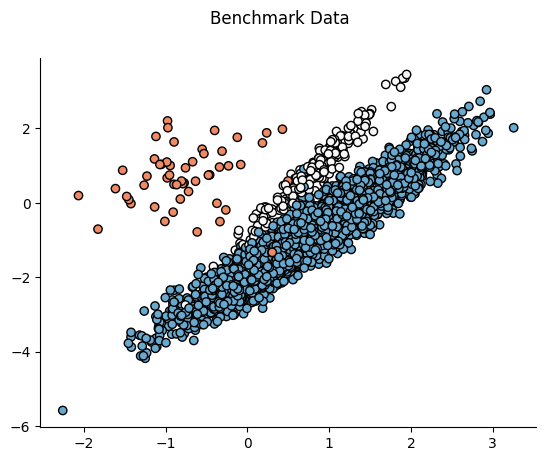

Counter({2: 4674, 1: 262, 0: 64})

In [ ]:
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)


colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data")
plt.show()
Counter(y)

## Oversampling

### SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE generates synthetic samples for the minority class by selecting two or more similar instances and generating new instances that lie between these instances in the feature space.

#### When to Use
- Use SMOTE when you have a continuous dataset without categorical features. It works well when your features are numerical and you want a straightforward method to balance your dataset.

by use sampling_strategy is 100%

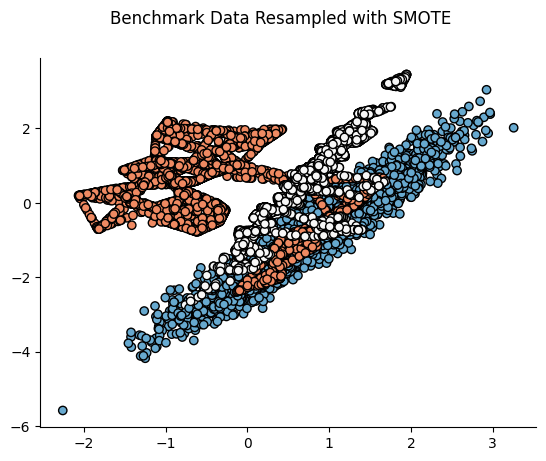

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with the categorical_features parameter
smote = SMOTE(random_state=42) # sampling_strategy=0.5 with binary class and sampling_strategy = {0: 100, 1: 100, 2: 100} with multi-class

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

by use sampling_strategy as you wish

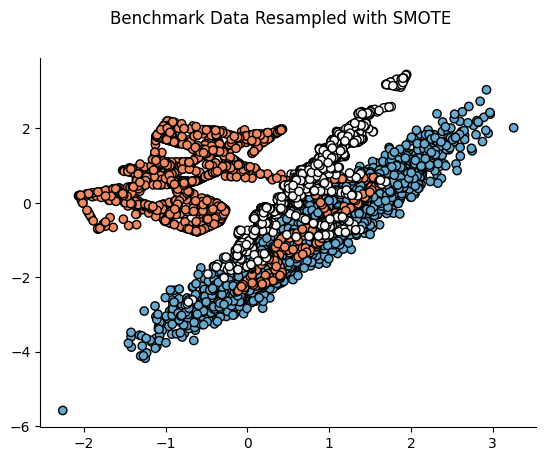

Counter({2: 4674, 1: 2000, 0: 2000})

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with the categorical_features parameter
smote = SMOTE(sampling_strategy = {0: 2000, 1: 2000},random_state=42) # sampling_strategy=0.5 with binary class and sampling_strategy = {0: 100, 1: 100, 2: 100} with multi-class

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SMOTE")
plt.show()
Counter(y_resampled)

### SVMSMOTE (SVM-SMOTE)
SVMSMOTE is a variation of SMOTE that uses Support Vector Machines (SVM) to generate synthetic samples. It focuses on generating samples near the decision boundary defined by the SVM.

#### When to Use
- Use SVMSMOTE when you want to generate synthetic samples near the decision boundary. It’s useful for datasets where the boundary between classes is complex, and traditional SMOTE might not perform well.

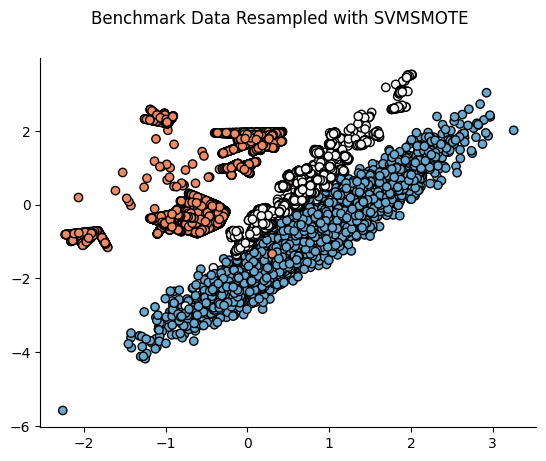

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
from imblearn.over_sampling import SVMSMOTE

# Initialize SVMSMOTE with the categorical_features parameter
svmsmote = SVMSMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with SVMSMOTE")
plt.show()
Counter(y_resampled)

### BorderlineSMOTE(kind='borderline-1')
BorderlineSMOTE focuses on generating synthetic samples near the borderlines of the minority class. In kind='borderline-1', it generates synthetic samples only for minority class instances that are near the borderline.

#### When to Use
- Use BorderlineSMOTE(kind='borderline-1') when you want to focus on balancing the dataset by generating samples specifically near the decision boundary to help the classifier better learn the separation between classes.

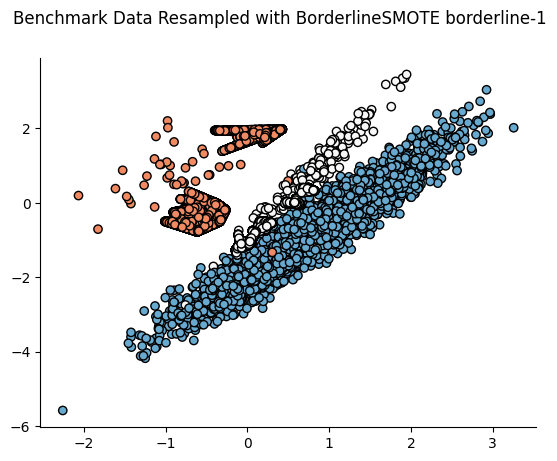

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Initialize BorderlineSMOTE with the categorical_features parameter
bl1smote = BorderlineSMOTE(kind='borderline-1',random_state=42)

# Resample the dataset
X_resampled, y_resampled = bl1smote.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with BorderlineSMOTE borderline-1")
plt.show()
Counter(y_resampled)

### BorderlineSMOTE(kind='borderline-2')
Similar to kind='borderline-1', but in kind='borderline-2', synthetic samples are generated both for minority class instances and their nearest neighbors, regardless of the class.

#### When to Use
- Use BorderlineSMOTE(kind='borderline-2') when you want to enhance the learning of the classifier by generating samples near the decision boundary, including from both minority and majority classes.

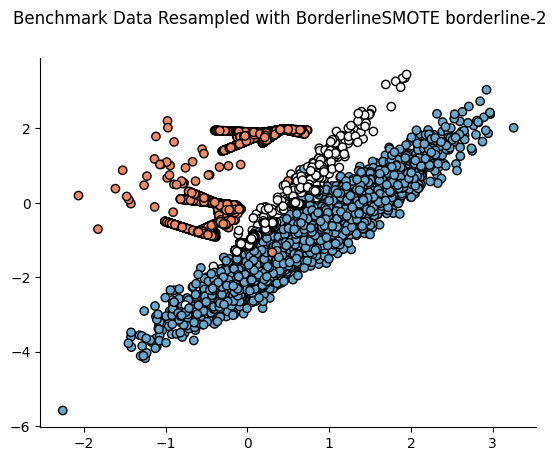

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Initialize BorderlineSMOTE with the categorical_features parameter
bl1smote = BorderlineSMOTE(kind='borderline-2',random_state=42)

# Resample the dataset
X_resampled, y_resampled = bl1smote.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with BorderlineSMOTE borderline-2")
plt.show()
Counter(y_resampled)

### ADASYN (Adaptive Synthetic Sampling)
ADASYN is an adaptive version of SMOTE. It generates synthetic samples based on the density of the minority class instances. It focuses more on generating samples for minority class instances that are harder to learn (i.e., near the boundary).

#### When to use
- Use ADASYN when you want to generate synthetic samples adaptively based on the learning difficulty. It is particularly useful when the class distribution is complex and you want to prioritize more difficult instances.

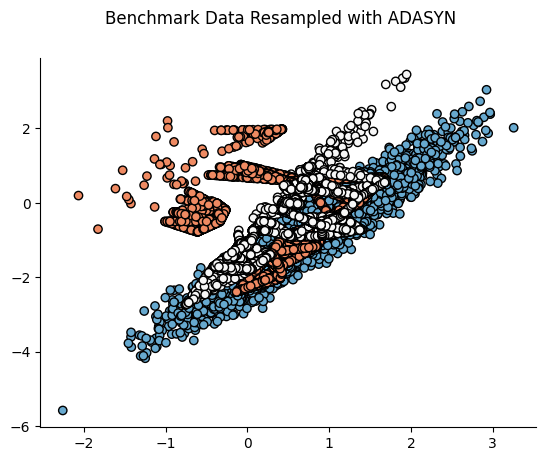

Counter({2: 4674, 0: 4673, 1: 4662})

In [ ]:
from imblearn.over_sampling import ADASYN

# Initialize BorderlineSMOTE with the categorical_features parameter
adasyn = ADASYN(random_state=42)

# Resample the dataset
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with ADASYN")
plt.show()
Counter(y_resampled)

### SMOTEN (SMOTE for Nominal)
SMOTEN is specifically designed for datasets with only categorical features. It generates synthetic samples by considering the categorical nature of the data.

#### When to Use
Use SMOTEN when your dataset contains only categorical features. It ensures that synthetic samples are generated in a way that respects the categorical nature of the data.

In [ ]:
from imblearn.over_sampling import SMOTEN

# Initialize SMOTEN with the categorical_features parameter
smoten = SMOTEN(random_state=42)

# Resample the dataset
# X_resampled, y_resampled = smoten.fit_resample(X, y)

# # Plot the resampled data
# kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
# colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
# plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
# sns.despine()
# plt.suptitle("Benchmark Data Resampled with SMOTEN")
# plt.show()
# Counter(y_resampled)

### SMOTENC (SMOTE for Nominal and Continuous)
SMOTENC is an extension of SMOTE that can handle both continuous and categorical features. It generates synthetic samples by considering the nature of the features, ensuring categorical features remain categorical.

#### When to Use
- Use SMOTENC when your dataset contains both numerical and categorical features. It helps in maintaining the integrity of categorical features while generating synthetic samples.

In [ ]:
from imblearn.over_sampling import SMOTENC

# Assume no categorical features for this example
categorical_features = []

# Initialize SMOTENC with the categorical_features parameter
smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)

# # Resample the dataset
# X_resampled, y_resampled = smotenc.fit_resample(X, y)

# # Plot the resampled data
# kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
# colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
# plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
# sns.despine()
# plt.suptitle("Benchmark Data Resampled with SMOTENC")
# plt.show()
# Counter(y_resampled)

### Summary Table

| Technique                              | Continuous Features | Categorical Features | Focus                                |
|----------------------------------------|---------------------|----------------------|--------------------------------------|
| SMOTE                                  | Yes                 | No                   | General over-sampling                |
| SVMSMOTE                               | Yes                 | No                   | Near decision boundary               |
| BorderlineSMOTE (kind='borderline-1')  | Yes                 | No                   | Near borderline minority samples     |
| BorderlineSMOTE (kind='borderline-2')  | Yes                 | No                   | Near borderline all samples          |
| ADASYN                                 | Yes                 | No                   | Adaptive, near difficult samples     |
| SMOTEN                                 | No                  | Yes                  | Categorical features only            |
| SMOTENC                                | Yes                 | Yes                  | Mixed feature types                  |


### Random_oversampling
Randomly replicating minority class examples until the dataset is balanced.

#### When to use 
- When you have a small imbalance and the data is not prone to overfitting.

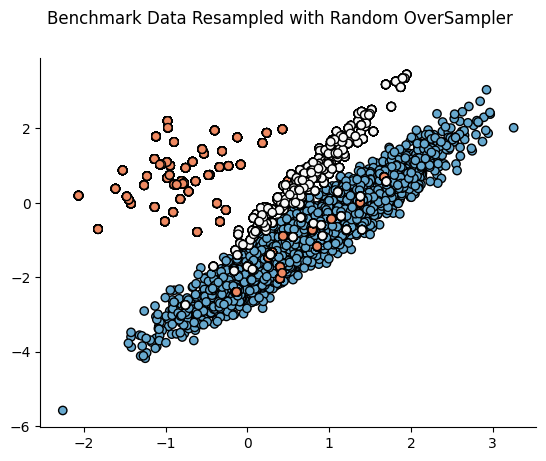

Counter({2: 4674, 1: 4674, 0: 4674})

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize BorderlineSMOTE with the categorical_features parameter
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with Random OverSampler")
plt.show()
Counter(y_resampled)

## Undersampling

### TomekLinks
Tomek Links are pairs of instances from different classes that are each other’s nearest neighbors. Removing these pairs can help clean the border between classes.

#### Use Case
- When you want to clean the dataset and make the decision boundary clearer by removing ambiguous points near the class boundary.

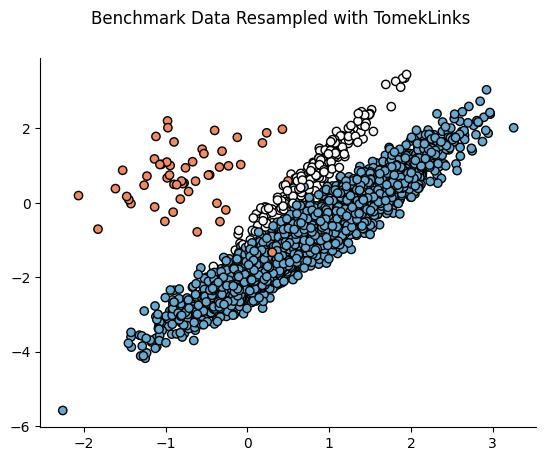

Counter({2: 4654, 1: 249, 0: 64})

In [ ]:
from imblearn.under_sampling import TomekLinks

# Initialize TomekLinks with the categorical_features parameter
tom = TomekLinks(n_jobs=-1)

# Resample the dataset
X_resampled, y_resampled = tom.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with TomekLinks")
plt.show()
Counter(y_resampled)

### EditedNearestNeighbours (ENN)
This technique removes instances from the majority class if they differ from their nearest neighbors. Specifically, it checks the class of the k-nearest neighbors of each instance and removes it if its class label differs from the majority of its neighbors.

#### Use Case
- When you want to smooth out class boundaries by removing misclassified majority class instances.

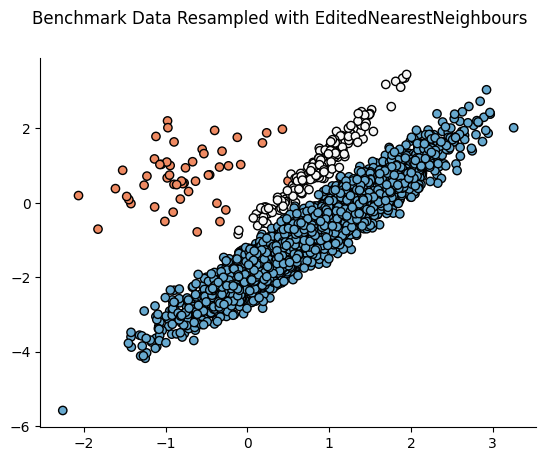

Counter({2: 4568, 1: 213, 0: 64})

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

# Initialize EditedNearestNeighbours with the categorical_features parameter
# enn = EditedNearestNeighbours()
enn = EditedNearestNeighbours(n_neighbors=3, kind_sel='all', n_jobs=-1)

# Resample the dataset
X_resampled, y_resampled = enn.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with EditedNearestNeighbours")
plt.show()
Counter(y_resampled)

### RepeatedEditedNearestNeighbours (RENN)
RENN is an extension of ENN where the ENN process is repeated multiple times until no more instances can be removed.

#### Use Case
- When ENN alone does not suffice, and you need a more aggressive cleaning of the majority class instances.

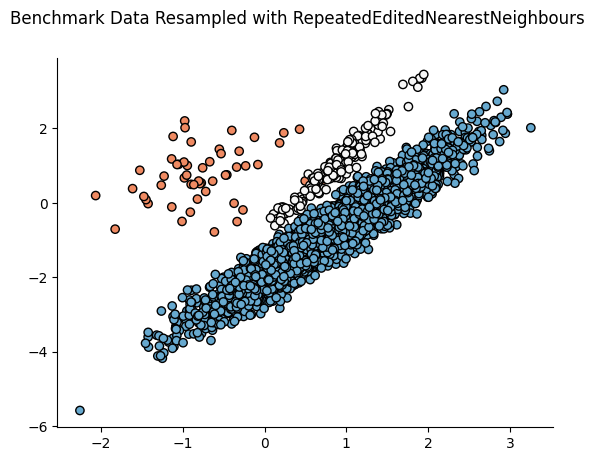

Counter({2: 4551, 1: 208, 0: 64})

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

# Initialize CondensedNearestNeighbour with the categorical_features parameter
# renn = RepeatedEditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours(n_neighbors=3, max_iter=100, kind_sel='all', n_jobs=-1)

# Resample the dataset
X_resampled, y_resampled = renn.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with RepeatedEditedNearestNeighbours")
plt.show()
Counter(y_resampled)

### All KNN (AIIKNN)
Similar to ENN, but it removes instances based on the majority vote of their k-nearest neighbors for multiple values of k.
#### Use Case
- When you want a more thorough and robust version of ENN, considering multiple neighbor configurations.

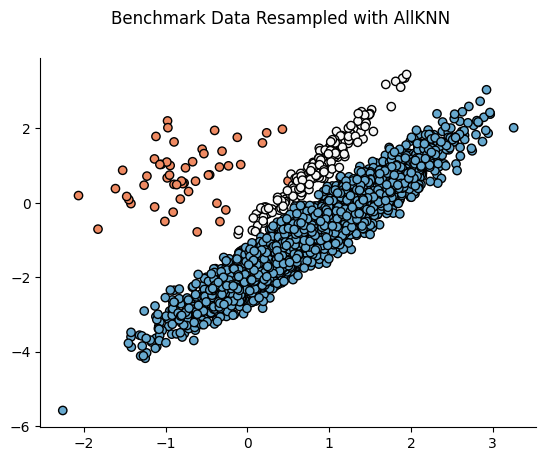

Counter({2: 4601, 1: 220, 0: 64})

In [ ]:
from imblearn.under_sampling import AllKNN

# Initialize AllKNN with the categorical_features parameter
# allknn = AllKNN()
allknn = AllKNN(n_neighbors=3, kind_sel='all', allow_minority=True, n_jobs=-1)

# Resample the dataset
X_resampled, y_resampled = allknn.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with AllKNN")
plt.show()
Counter(y_resampled)

### CondensedNearestNeighbour (CNN)
CNN aims to retain a subset of the training data that ensures the nearest neighbor rule will yield the same results as the full dataset. It starts with the minority class and iteratively adds majority class instances that are misclassified by the current subset.
#### Use Case
- When you need to reduce the dataset size while retaining a representative sample that maintains the same classification performance.

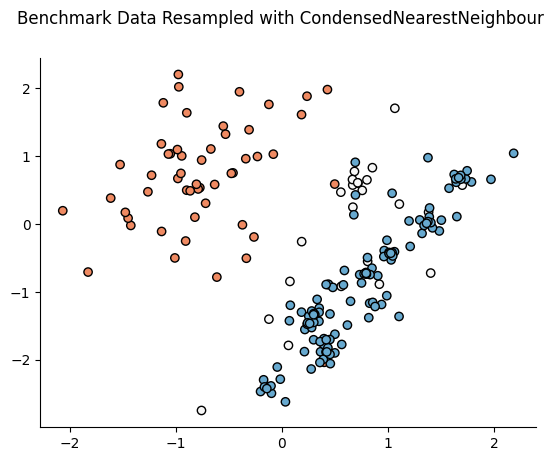

Counter({2: 113, 0: 64, 1: 23})

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

# Initialize CondensedNearestNeighbour with the categorical_features parameter
# cnn = CondensedNearestNeighbour()
cnn = CondensedNearestNeighbour(n_neighbors=1, random_state=42, n_jobs=-1)


# Resample the dataset
X_resampled, y_resampled = cnn.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with CondensedNearestNeighbour")
plt.show()
Counter(y_resampled)

### Cluster Centroids
This technique uses clustering (e.g., K-Means) to generate synthetic instances that represent the centroids of clusters formed by the majority class.

#### Use Case
- When you want to reduce the majority class size by summarizing it through representative points.

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=19.
  warnings.warn(


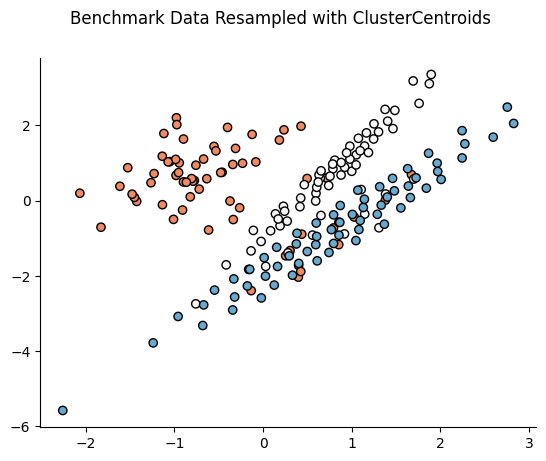

Counter({0: 64, 1: 64, 2: 64})

In [ ]:
from imblearn.under_sampling import ClusterCentroids

# Initialize ClusterCentroids with the categorical_features parameter
# cc = ClusterCentroids()
cc = ClusterCentroids(random_state=42, voting='soft')

# Resample the dataset
X_resampled, y_resampled = cc.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with ClusterCentroids")
plt.show()
Counter(y_resampled)

### NearMiss
NearMiss is a family of undersampling methods that selects majority class instances based on their distance to minority class instances. Different versions (NearMiss-1, NearMiss-2, etc.) define "closeness" in various ways.

#### Use Case
- When you want to ensure that the remaining majority class instances are those closest to the minority class, which can help with learning a more precise decision boundary.

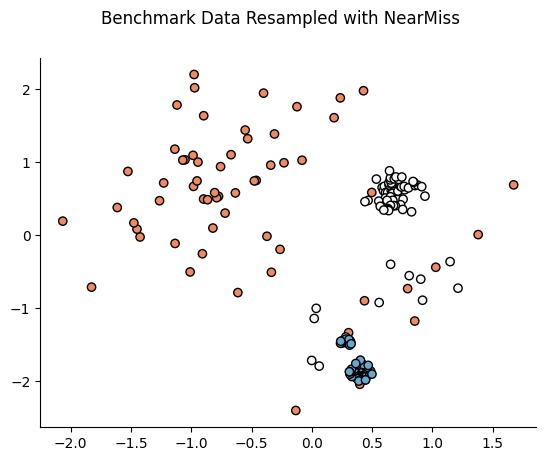

Counter({0: 64, 1: 64, 2: 64})

In [ ]:
from imblearn.under_sampling import NearMiss

# Initialize NearMiss with the categorical_features parameter
# nm = NearMiss()
nm = NearMiss(version=1, n_neighbors=3, n_jobs=-1)

# Resample the dataset
X_resampled, y_resampled = nm.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with NearMiss")
plt.show()
Counter(y_resampled)

### Random_undersampling
Randomly removes instances from the majority class to achieve a more balanced dataset.
#### Use Case
- When you need a simple and quick method to balance the dataset, keeping in mind that it might remove potentially informative instances.

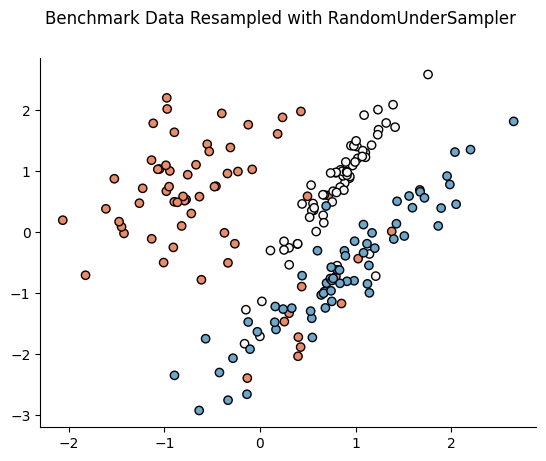

Counter({0: 64, 1: 64, 2: 64})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler with the categorical_features parameter
rus = RandomUnderSampler() 
rus = RandomUnderSampler(random_state=42) # sampling_strategy=.5

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot the resampled data
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Benchmark Data Resampled with RandomUnderSampler")
plt.show()
Counter(y_resampled)

### Summary
- Use TomekLinks and ENN to clean and refine the dataset, especially near decision boundaries.
- Use RENN and All KNN for more aggressive cleaning.
- Use CNN to retain a smaller, representative subset of the data.
- Use Cluster Centroids to summarize and reduce the majority class size.
- Use NearMiss to keep majority class instances close to the minority class.
- Use Random Undersampling for a quick and simple approach to balance the dataset.

### *------------------------------------------------------------------------------------------------------------------*

# Feature Selection

## Read data

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

X , y = load_iris()

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.2 , random_state=42)

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## 1. Filter Methods

## Select Methods
Methods is used to select the most relevant features from a dataset based on statistical tests.

### 1. SelectKBest
Selects the top 𝑘 features based on a specified statistical test score.

#### When to use: 
- Use this method when you want to retain a fixed number of top features regardless of the threshold.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Example statistical test

# SelectKBest
k_best = SelectKBest(score_func=f_classif, k=2)
X_k_best = k_best.fit_transform(X, y)

### 2. SelectFpr
Selects features based on the false positive rate (FPR). It uses a specified threshold to select features with a p-value lower than the threshold.

#### When to use: 
- Use this method when you want to control the selection process based on the false positive rate.

In [ ]:
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import f_classif  # Example statistical test

# SelectFpr
fpr = SelectFpr(score_func=f_classif, alpha=0.05)
X_fpr = fpr.fit_transform(X, y)

### 3. SelectFdr
Selects features based on the false discovery rate (FDR). It controls the expected proportion of incorrectly rejected null hypotheses (false discoveries).

#### When to use:
- Use this method when you want to control the rate of false discoveries, especially useful in scenarios with multiple comparisons.

In [ ]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import f_classif  # Example statistical test

# SelectFdr
fdr = SelectFdr(score_func=f_classif, alpha=0.05)
X_fdr = fdr.fit_transform(X, y)

### 4. SelectFwe
Selects features based on the family-wise error rate (FWE). It controls the probability of making at least one type I error among all the tests.

#### When to use:
- Use this method when you want to be very stringent about not making any type I errors.

In [ ]:
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_classif  # Example statistical test

# SelectFwe
fwe = SelectFwe(score_func=f_classif, alpha=0.05)
X_fwe = fwe.fit_transform(X, y)

### 5. SelectPercentile
Selects features based on the percentile of the highest scores. You specify a percentile instead of an absolute number.

#### When to use: 
- Use this method when you want to retain a certain percentage of the top features rather than a fixed number.

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif  # Example statistical test

# SelectPercentile
percentile = SelectPercentile(score_func=f_classif, percentile=50)
X_percentile = percentile.fit_transform(X, y)

### 6. GenericUnivariateSelect
Provides a configurable strategy for univariate feature selection. You can choose the mode (percentile, k-best, FPR, FDR, or FWE) and customize it.

#### When to use: 
- Use this method when you need more flexibility and want to dynamically select features based on different strategies.

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_classif  # Example statistical test

# GenericUnivariateSelect
generic_select = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=2)
X_generic = generic_select.fit_transform(X, y)

### Summary
- SelectKBest: Fixed number of top features.
- SelectFpr: Features below a p-value threshold based on FPR.
- SelectFdr: Controls false discovery rate.
- SelectFwe: Controls family-wise error rate.
- SelectPercentile: Percentage of top features.
- GenericUnivariateSelect: Flexible, configurable strategy.

## statistical Methods

### 1. Pearson Correlation Coefficient
Pearson correlation measures the linear correlation between two variables, producing a value between -1 and 1. A value closer to 1 or -1 indicates a strong correlation.

#### Advantages:
- Simple to implement and understand. (Simple to compute)
- Provides insights into the linear relationships between features. (Effective for linear relationships)

#### Disadvantages:
- Only detects linear relationships.
- Can be misleading if the data contains outliers. (Sensitive to outliers)

#### When to Use:
- When you expect a linear relationship between features and the target variable.
- When the dataset is relatively clean and free of outliers.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fr=SelectKBest(f_regression ,k=8)
fr.fit(x_train,y_train)
x_train_selecetd =fr.transform(x_train)
x_test_selecetd =fr.transform(x_test)

Selected Features: ['feature1', 'feature2', 'feature3']


### 2. Chi-Square Test
The chi-square test measures the dependence between two categorical variables. It is used to assess whether a feature is independent of the target variable, often used for categorical data.

#### Advantages:
- Effective for categorical data.
- Non-parametric, does not assume a normal distribution.
- Identifies non-linear relationships.

#### Disadvantages:
- Only works with categorical features.
- Requires large sample sizes for reliable results.
- Not suitable for continuous variables.

#### When to Use:
- When features and target variable are categorical.
- When you have a large enough dataset to provide reliable chi-square statistics.

#### note:
- don't work when use StanderScaler() before it because the feature has negative number.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi=SelectKBest(chi2 ,k=8)
chi.fit(x_train,y_train)
x_train_selecetd =chi.transform(x_train)
x_test_selecetd =chi.transform(x_test)

### 3. ANOVA F-Test
ANOVA F-test measures the linear dependency between features and the target variable by comparing the variances within and between groups.

#### Advantages:
- Simple and fast.
- Effective for numerical data.
- Suitable for continuous data.
- Can handle multiple features at once.

#### Disadvantages:
- Assumes normal distribution.
- Only detects linear relationships.

#### When to Use:
- When features and target are numerical and normally distributed.
- When the assumptions of normality are met.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

fc=SelectKBest(f_classif ,k=8)
fc.fit(x_train,y_train)
x_train_selecetd =fc.transform(x_train)
x_test_selecetd =fc.transform(x_test)

### 4. Mutual Information
Mutual Information measures the mutual dependence between variables, capturing both linear and non-linear relationships.

#### Advantages:
- Captures both linear and non-linear relationships.
- Suitable for both numerical and categorical data.

#### Disadvantages:
- Computationally intensive for large datasets.
- Requires discretization for continuous variables.
- Results can be less interpretable compared to simpler methods.

#### When to Use:
- When you need to capture non-linear relationships between features.
- When dealing with a mix of categorical and continuous data.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

mic=SelectKBest(mutual_info_classif ,k=8)
mic.fit(x_train,y_train)
x_train_selecetd =mic.transform(x_train)
x_test_selecetd =mic.transform(x_test)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

mir=SelectKBest(mutual_info_regression ,k=8)
mir.fit(x_train,y_train)
x_train_selecetd =mir.transform(x_train)
x_test_selecetd =mir.transform(x_test)

### 5. Variance Threshold
Variance Threshold removes all features whose variance does not meet some threshold. Features with low variance are less likely to be useful for distinguishing between classes.

### Advantages:
- Simple and fast to compute. (Simple to implement)
- Removes redundant features.
- Effective in removing constant or near-constant features.

### Disadvantages:
- May remove features that are important but have low variance.
- Does not consider the relationship between features and the target variable.

### When to Use:
- As a preprocessing step to remove low-variance features.
- As a preliminary step to remove features with very low variance.
- When dealing with high-dimensional data where some features are constant.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt=VarianceThreshold(threshold=0.0)
mic.vt(x_train,y_train)
x_train_selecetd =vt.transform(x_train)
x_test_selecetd =vt.transform(x_test)

## 2. Wrapper Methods

### 1. Recursive Feature Elimination (RFE)
RFE works by recursively removing the least important features and building the model with the remaining features. The importance of a feature is determined based on the model's performance.

#### Advantages:
- Considers feature interactions.
- Effective for small to medium-sized datasets.
- Provides a ranking of features.

#### Disadvantages:
- Computationally expensive.
- Prone to overfitting on small datasets.

#### When to Use:
- When you have a small to medium-sized dataset and want to consider feature interactions.
- When you have sufficient computational resources.
- When feature interactions are important to capture.

In [ ]:
from sklearn.feature_extraction import RFE
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lin_svc=LinearSVC()
log_reg = LogisticRegression()

rfe=RFE(lin_svc, n_features_to_select=10)
rfe.fit(x_train, y_train)

x_train_selected=rfe.transform(x_train)
x_test_selected=rfe.transform(x_test)

### 2. Recursive Feature Elimination with Cross-Validation (RFECV)
RFECV is an extension of Recursive Feature Elimination (RFE) that uses cross-validation to determine the optimal number of features. It recursively removes the least important features and uses cross-validation to evaluate the model performance at each step.

#### Advantages:
- Automatically selects the optimal number of features.
- Reduces the risk of overfitting by using cross-validation.
- Considers feature interactions.

#### Disadvantages:
- More computationally intensive than RFE due to cross-validation.
- Can still be slow for very large datasets.
- Prone to overfitting on small datasets.

#### When to Use:
- When you want to determine the optimal number of features automatically and consider feature interactions.
- When you have sufficient computational resources.
- When you want to automatically determine the optimal number of features.
- When cross-validation is necessary to prevent overfitting.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lin_svc=LinearSVC()
log_reg = LogisticRegression()

skf = StratifiedKFold(5)

rfecv=RFECV(estimator=lin_svc, step=1, cv=skf, scoring='accuracy')
rfecv.fit(x_train, y_train)

x_train_selected=rfecv.transform(x_train)
x_test_selected=rfecv.transform(x_test)

### 3. Sequential Feature Selection (SFS)
Sequential Feature Selection (SFS) is a greedy search algorithm that adds or removes features sequentially based on the model's performance. There are two types: forward selection and backward elimination.

#### Advantages:
- Simple and intuitive.
- Can be used with any model.
- Can handle feature interactions.

#### Disadvantages:
- Computationally expensive.
- Prone to local optima.
- May overfit if the dataset is small.

#### When to Use:
- When you need a simple and intuitive method to select features considering interactions.
- When you have sufficient computational resources.
- When feature interactions are important to capture.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lin_svc=LinearSVC()
log_reg = LogisticRegression()

forward_sfs=SequentialFeatureSelector(estimator=lin_svc , n_features_to_select=10 , direction='forward')
forward_sfs.fit(x_train, y_train)

x_train_selected=forward_sfs.transform(x_train)
x_test_selected=forward_sfs.transform(x_test)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lin_svc=LinearSVC()
log_reg = LogisticRegression()

backward_sfs=SequentialFeatureSelector(estimator=lin_svc , n_features_to_select=10 , direction='backward')
backward_sfs.fit(x_train, y_train)

x_train_selected=backward_sfs.transform(x_train)
x_test_selected=backward_sfs.transform(x_test)

### 4. Exhaustive Feature Selection
Exhaustive feature selection evaluates all possible combinations of features to find the best subset based on model performance.

#### Advantages:
- Guarantees the optimal feature subset.

#### Disadvantages:
- Extremely computationally intensive.
- Not feasible for large feature sets.

#### When to Use:
- When the feature set is small.
- When you need the optimal feature subset.

In [ ]:
from sklearn.feature_selection import ExhaustiveFeatureSelector
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

lin_svc=LinearSVC()
log_reg = LogisticRegression()

efs=ExhaustiveFeatureSelector(lin_svc, min_features=1, max_features=2, scoring='accuracy', cv=5)
efs.fit(x_train, y_train)

x_train_selected=efs.transform(x_train)
x_test_selected=efs.transform(x_test)

### 5. SelectFromModel
SelectFromModel is a meta-transformer that selects features based on the importance weights from an estimator (e.g., coefficients in linear models, feature importances in tree-based models).

#### Advantages:
- Flexible and can be used with any model that provides feature importance.
- Considers feature importance as determined by the model.

#### Disadvantages:
- Performance depends on the quality of the underlying model.
- May not work well if the model's feature importance scores are not reliable.
- Requires an estimator that provides feature importance.
- May require tuning of the threshold parameter to select the appropriate number of features.

#### When to Use:
- When you have a model that provides reliable feature importance scores and you want to use them for feature selection.
- When you want a flexible feature selection method that can work with various types of models.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lin_svc=LinearSVC()
log_reg = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100)

sfm=SelectFromModel(estimator=rfc, threshold='mean')
sfm.fit(x_train, y_train)

x_train_selected=sfm.transform(x_train)
x_test_selected=sfm.transform(x_test)

### 6. Genetic Algorithm (GA)
Genetic Algorithms (GA) are inspired by the process of natural selection. They use operations like selection, crossover, and mutation to evolve a population of feature subsets towards optimal solutions.

#### Advantages:
- Can escape local optima.
- Can handle large search spaces.
- Capable of capturing complex feature interactions.

#### Disadvantages:
- Computationally expensive.
- Highly computationally intensive.
- Requires careful tuning of parameters.

#### When to Use:
- When you have very large feature sets and sufficient computational resources.
- When dealing with large search spaces and complex feature interactions.
- When traditional methods fail to find good feature subsets.

In [ ]:
from tpot import TPOTClassifier


tpot_C=TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot_C.fit(x_train, y_train)

x_train_selected=tpot_C.transform(x_train)
x_test_selected=tpot_C.transform(x_test)

In [ ]:
from tpot import TPOTRegressor


tpot_R=TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot_R.fit(x_train, y_train)

x_train_selected=tpot_R.transform(x_train)
x_test_selected=tpot_R.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np
import random

# Example data
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

def fitness_function(individual):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0
    score = cross_val_score(LogisticRegression(), X[:, selected_features], y, cv=5).mean()
    return score

def genetic_algorithm(population, generations, mutation_rate):
    for generation in range(generations):
        scores = [fitness_function(individual) for individual in population]
        best_individual = population[np.argmax(scores)]
        new_population = [best_individual]
        for _ in range(len(population) - 1):
            parent1, parent2 = random.choices(population, weights=scores, k=2)
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]
            child = [gene if random.random() > mutation_rate else 1 - gene for gene in child]
            new_population.append(child)
        population = new_population
    return best_individual

# Initial population (binary representation of feature subsets)
initial_population = [[random.randint(0, 1) for _ in range(X.shape[1])] for _ in range(20)]
best_individual = genetic_algorithm(initial_population, generations=50, mutation_rate=0.01)

selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
print("Selected Features:", selected_features)


## 3. Embedded Methods

### 1. Lasso Regression (L1 Regularization)
Lasso (Least Absolute Shrinkage and Selection Operator) is a linear model that includes an L1 regularization term. This regularization term constrains the coefficients of the model, potentially forcing some of them to be exactly zero, thereby performing feature selection.

#### Advantages:
- Can reduce the number of features by driving some coefficients to zero.
- Helps to prevent overfitting.
- Can improve model interpretability.

#### Disadvantages:
- Can be computationally expensive.
- Can be unstable when features are highly correlated.
- Tends to select only one feature from a group of correlated features.
- Only works with linear models.

#### When to Use:
- When you have a linear model and need to reduce the number of features.
- When you have a large number of features and want to perform feature selection.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 2. Ridge Regression (L2 Regularization)
Ridge Regression is similar to LASSO but uses L2 regularization. While it doesn't perform feature selection by zeroing coefficients, it can still be used to reduce the impact of less important features.

#### Advantages:
- Helps to prevent overfitting.
- Handles multicollinearity better.
- All features remain in the model.
- Works well when you have many features.

#### Disadvantages:
- Does not perform feature selection (all coefficients are shrunk but none are driven to zero).

#### When to Use:
- When you have a linear model with many features and want to prevent overfitting.
- When you have multicollinearity in your features and don't need explicit feature selection.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 3. Elastic Net
Elastic Net combines both L1 and L2 regularization terms. This technique can balance between the feature selection properties of LASSO and the stability of Ridge Regression.

#### Advantages:
- Can select features and prevent overfitting.
- Can handle correlated features better.
- Balances the strengths of Lasso and Ridge.

#### Disadvantages:
- Can be computationally expensive.
- More complex to tune due to two regularization parameters.

#### When to Use:
- When you need both feature selection and regularization in a linear model.
- When you want a balance between feature selection and handling multicollinearity.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 4. Decision Trees
Decision Trees can be used for feature selection by evaluating the importance of each feature in splitting the data at various points.

#### Advantages:
- Simple to interpret.
- Can capture non-linear relationships.

#### Disadvantages:
- Prone to overfitting.
- Can be unstable with small data changes.

#### When to Use:
- When interpretability is important and the relationship between features and target is non-linear.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 5. Random Forest
Random Forest is an ensemble method of decision trees that can provide a measure of feature importance by averaging the importance measures of each tree.

#### Advantages:
- Reduces overfitting compared to individual decision trees.
- Provides feature importance measures.

#### Disadvantages:
- Can be computationally intensive.

#### When to Use:
- When you need robust feature importance measures and have enough computational resources.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 6. Gradient Boosting Machines (GBM)
GBM builds an ensemble of decision trees in a sequential manner. It can provide feature importance based on the improvement of the loss function attributed to each feature.

#### Advantages:
- High accuracy.
- Can handle various data types.
- Provides feature importance measures.

#### Disadvantages:
- Can overfitting if not properly tuned.
- Computationally expensive.
- Requires careful parameter tuning.

#### When to Use:
- When high accuracy is needed and you want a robust feature importance ranking.

#### ----------------------------------------------------------------------------------------------------------------------------------

### 7. XGBoost (Extreme Gradient Boosting)
XGBoost is an implementation of gradient boosting that uses decision trees and an ensemble learning method to improve the performance of predictive models. It includes several enhancements like regularization, which helps in feature selection.

#### Advantages:
- High accuracy.
- Handles missing values.
- Built-in feature selection through regularization.
- Supports parallel processing.
- Robust to outliers and non-linear relationships.

#### Disadvantages:
- Can be complex to tune.
- Can overfitting if not properly regularized.
- Requires significant computational resources for large datasets.

#### When to Use:
- When you need a high-performing model and have sufficient computational resources.
- When dealing with complex datasets that might include non-linear relationships and interactions between features.

# Dimensionality reduction

## 1. Linear Dimensionality Reduction

### 1. Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical procedure that uses orthogonal transformation to convert a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components.

#### Architecture
- Standardize the Data: Subtract the mean of each variable and divide by its standard deviation.
- Covariance Matrix Computation: Calculate the covariance matrix of the standardized data.
- Eigenvalue Decomposition: Compute the eigenvalues and eigenvectors of the covariance matrix.
- Sort Eigenvalues and Eigenvectors: Order eigenvalues in descending order and sort the corresponding eigenvectors.
- Projection: Project the data onto the eigenvectors corresponding to the largest eigenvalues.

#### Advantages
- Improves algorithm performance by reducing overfitting by reducing the number of features.
- Removes correlated features.
- Improves visualization.

#### Disadvantages
- Loses interpretability of the original features.
- Interpretability of principal components can be challenging.
- May lose important information.
- Sensitive to the scale of the data.

#### When to Use:
- When you have a large set of features.
- When you want to reduce the dimensionality of data for visualization.
- When you want to improve the performance of machine learning algorithms by removing multicollinearity.

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create PCA object
pca = PCA(n_components=2)
# Parameters
# n_components: Number of components to keep. If n_components is not set all components are kept.
# whiten: When True (default), the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
# svd_solver: The solver to use ('auto', 'full', 'arpack', 'randomized').

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_

print("PCA Components:\n", X_pca)
print("Explained Variance Ratio:", explained_variance)
print("PCA Components:\n", pca.components_)

### 2. Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) is a method used for dimensionality reduction that finds the linear combinations of features that best separate two or more classes of objects.

#### Architecture
- Compute the Mean Vectors: Calculate the mean vectors for each class.
- Compute the Scatter Matrices: Calculate the within-class and between-class scatter matrices.
- Compute Eigenvalues and Eigenvectors: Solve the generalized eigenvalue problem for the scatter matrices.
- Sort and Select Components: Sort the eigenvalues in descending order and select the top eigenvectors.
- Transform Data: Project the data onto the new feature space.

#### Advantages
- Enhances class separability.
- Takes class labels into account
- Useful in classification tasks.
- Reduces dimensionality while preserving as much class discriminatory information as possible.

#### Disadvantages
- Assumes normally distributed classes with identical covariance matrices.
- May not work well with non-linearly separable data.

#### When to Use:
- When you have labeled data.
- When performing classification tasks.
- When you want to reduce the dimensionality of the data while preserving class separability.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
y = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

# Create LDA object
lda = LDA(n_components=1)
# Parameters
# n_components: Number of components to keep.
# solver: The solver to use ('svd', 'lsqr', 'eigen').
# shrinkage: Shrinkage parameter (None, 'auto', float).

# Fit and transform the data
X_lda = lda.fit_transform(X, y)

print("LDA Components:\n", lda.scalings_)
print("LDA Components:\n", X_lda)

### 3. Factor Analysis (FA)
Factor Analysis (FA) is a technique used to identify underlying relationships between variables by modeling the observed variables as linear combinations of potential factors plus unique variances.

#### Architecture
- Standardize the Data: Normalize the dataset.
- Compute the Covariance Matrix: Calculate the covariance matrix of the standardized data.
- Eigenvalue Decomposition: Perform eigenvalue decomposition of the covariance matrix.
- Select Factors: Choose the number of factors based on eigenvalues.
- Compute Factor Loadings: Calculate the factor loadings matrix.
- Transform Data: Project the original data onto the factor loadings.
- --------
- Estimating the factor loadings.
- Extracting the factors that explain the observed correlations.
- Rotating the factors to achieve simpler and more interpretable structure.

#### Advantages
- Reduces dimensionality while retaining the relationships between variables.
- Useful in identifying underlying factors.
- Identifies hidden relationships between variables.
- Useful for understanding data structure.

#### Disadvantages
- Assumes linear relationships.
- Interpretation of factors can be subjective.
- Sensitive to outliers.
- Requires large sample sizes.

#### When to Use:
- When you want to identify underlying relationships between variables.
- When you want to reduce the dimensionality of data while retaining meaningful information.

In [ ]:
from sklearn.decomposition import FactorAnalysis
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create FA object
fa = FactorAnalysis(n_components=2)
# Parameters
# n_components: Number of components to keep.
# tol: Stopping criterion for EM algorithm.

# Fit and transform the data
X_fa = fa.fit_transform(X)

print("FA Components:\n", fa.components_)
print("Factor Analysis Components:\n", X_fa)

### 4. Truncated Singular Value Decomposition (SVD)
Truncated Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three matrices, reducing the dimensionality by truncating the number of singular values and vectors.

#### Architecture
- Standardize the Data: Normalize the dataset.
- Compute SVD: Calculate the singular value decomposition of the standardized data.
- Truncate Components: Select the top k singular values and corresponding vectors.
- Transform Data: Project the data onto the truncated components.
- ---------
- Decomposing the matrix into U, Σ, and V^T.
- Truncating the matrices to keep only the top k singular values and vectors.
- Reconstructing the matrix using the truncated matrices.

#### Advantages
- Handles large and sparse matrices efficiently.
- Useful in latent semantic analysis.
- Effective for dimensionality reduction.
- Preserves most of the energy of the data.
- Useful for sparse data and text data.

#### Disadvantages
- Sensitive to noise in the data.
- Computationally expensive for large matrices.
- Loses some information due to truncation.

#### When to Use:
- When working with sparse data or text data.
- When you need to reduce dimensionality for visualization or analysis.
- When you want to perform matrix approximation.

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Example data
X = np.random.random((10, 5))

# Create SVD object
svd = TruncatedSVD(n_components=2)
# Parameters
# n_components: Number of components to keep.
# algorithm: SVD solver to use ('randomized', 'arpack').


# Fit and transform the data
X_svd = svd.fit_transform(X)

print("Explained Variance Ratio:", svd.explained_variance_ratio_)
print("SVD Components:\n", svd.components_)
print("Truncated SVD Components:\n", X_svd)

### 5. Independent Component Analysis (ICA)
Independent Component Analysis (ICA) is a computational method for separating a multivariate signal into additive, independent non-Gaussian signals called independent components.

#### Architecture
- Center the Data: Subtract the mean of each variable.
- Whiten the Data: Decorrelate the data using PCA or another method.
- Iteratively estimating the independent components.
- Maximize Non-Gaussianity: Use an iterative algorithm (e.g., FastICA) to maximize the non-Gaussianity of the components.
- Transform Data: Obtain the independent components.

#### Advantages
- Identifies underlying factors that are statistically independent.
- Useful in blind source separation.
- Separates mixed signals into independent sources.
- Useful for signal processing and blind source separation.

#### Disadvantages
- Sensitive to noise and outliers.
- Assumes independence and non-Gaussianity of sources.

#### When to Use:
- When you need to separate mixed signals.
- When performing blind source separation.
- When dealing with non-Gaussian data.

In [ ]:
from sklearn.decomposition import FastICA
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create ICA object
ica = FastICA(n_components=2)
# Parameters
# n_components: Number of components to keep.
# algorithm: The algorithm to use ('parallel', 'deflation').
# whiten: If True, the data will be whitened before applying the algorithm.

# Fit and transform the data
X_ica = ica.fit_transform(X)

print("ICA Components:\n", ica.components_)
print("ICA Components:\n", X_ica)

## 1. non-Linear Dimensionality Reduction

### 1. t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique well-suited for embedding high-dimensional data into a lower-dimensional space of two or three dimensions, making it easier to visualize.

t-SNE is a non-linear dimensionality reduction technique particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot.

#### Architecture
- Pairwise Similarity Calculation: Compute pairwise similarities between data points in the high-dimensional space.
- Joint Probability Distribution: Convert the similarities into probabilities such that similar points have a high probability of being together.
- Low-Dimensional Mapping: Map the data to a lower-dimensional space, aiming to preserve the probability distribution.
- Minimize Kullback-Leibler Divergence: Use gradient descent to minimize the Kullback-Leibler divergence between the high-dimensional and low-dimensional distributions.

#### Advantages
- Captures complex relationships and structures in the data.
- Excellent for visualizing high-dimensional data.

#### Disadvantages
- Computationally expensive.
- Not deterministic (different runs may yield different results).
- Does not preserve global structure.
- Sensitive to parameter choices.

#### When to Use:
- When you need to visualize high-dimensional data in 2D or 3D.
- When you are interested in understanding the local structure of data.

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create a t-SNE instance
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
# Parameters
# n_components: Dimension of the embedded space.
# perplexity: Balances attention between local and global aspects of the data.
# learning_rate: Controls the speed of convergence.
# n_iter: Maximum number of iterations for the optimization.
# random_state: Seed for reproducibility.

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

print("t-SNE Components:\n", X_tsne)

### 2. Uniform Manifold Approximation and Projection (UMAP)
Uniform Manifold Approximation and Projection (UMAP) is a non-linear dimensionality reduction technique that creates a low-dimensional representation of the data, preserving the local and global structure of the data and is computationally efficient.

#### Architecture
- Compute K-Nearest Neighbors: Calculate the nearest neighbors for each data point.
- Graph Construction: Build a weighted graph based on the nearest neighbors.
- Graph Layout Optimization: Use a force-directed graph layout algorithm to optimize the graph in the lower-dimensional space.
- Embedding: Map the data points to the lower-dimensional space.
- --------
- Constructing a high-dimensional graph representation of the data.
- Optimizing a low-dimensional graph to be as structurally similar as possible to the high-dimensional graph.

#### Advantages
- Preserves both local and global data structures.
- Faster than t-SNE.
- Supports larger datasets.

#### Disadvantages
- Sensitive to parameter tuning.
- Can sometimes be sensitive to initialization.
- May not always preserve global structures as well as local structures.

#### When to Use:
- When you need efficient and scalable non-linear dimensionality reduction.
- When preserving both local and global structures is important.

In [ ]:
import umap
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create a UMAP instance
umap_model = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='euclidean')
# Parameters
# n_neighbors: Controls the local neighborhood size.
# n_components: Dimension of the embedded space.
# min_dist: Minimum distance between points in the low-dimensional space.
# metric: Distance metric to use for the tree.

# Fit and transform the data
X_umap = umap_model.fit_transform(X)

print("UMAP Components:\n", X_umap)

### 3. Autoencoders
Autoencoders are neural networks used for learning efficient codings of input data. They aim to map the input data to a lower-dimensional representation and then reconstruct the input from this representation.

#### Architecture
- Encoder Network: Maps the input data to a lower-dimensional latent space.
- Latent Space Representation: The bottleneck layer that contains the compressed representation of the input data.
- Decoder Network: decoder part that reconstructs the input from the compressed representation.

#### Advantages
- Capable of capturing non-linear relationships.
- Can be tailored for different types of data (e.g., images, sequences).
- Flexible and customizable.

#### Disadvantages
- Requires a large amount of data.
- Requires significant computational resources.
- May overfit if not properly regularized.
- Can be difficult to train.

#### When to Use:
- When you need a flexible model for non-linear dimensionality reduction.
- When you have sufficient computational resources and data to train the model.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Define the autoencoder architecture
input_dim = X.shape[1]
encoding_dim = 2  # Dimension of the latent space
# Parameters
# encoding_dim: Dimension of the latent space.

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
# Parameters
# optimizer: Optimization algorithm.
# loss: Loss function for training.

# Train the autoencoder
autoencoder.fit(X, X, epochs=100, batch_size=2, shuffle=True, verbose=0)
# Parameters
# epochs: Number of training epochs.
# batch_size: Size of the training batches.

# Encode the data to the latent space
encoder_model = Model(inputs=input_layer, outputs=encoder)
X_encoded = encoder_model.predict(X)

print("Autoencoder Components:\n", X_encoded)


### 4. Kernel Principal Component Analysis (Kernel PCA)
Kernel Principal Component Analysis (Kernel PCA) extends PCA by using kernel methods to project the data into a higher-dimensional space where it becomes linearly separable.

#### Architecture
- Choose Kernel Function: Select a kernel function (e.g., linear, polynomial, RBF).
- Compute Kernel Matrix: Calculate the kernel matrix for the input data.
- Center the Kernel Matrix: Center the kernel matrix.
- Eigenvalue Decomposition: Perform eigenvalue decomposition on the centered kernel matrix.
- Project Data: Project the data onto the principal components.

#### Advantages
- Captures non-linear relationships in the data.
- Flexible with different kernel functions.

#### Disadvantages
- Computationally expensive for large datasets.
- Choice of kernel and parameters can significantly impact performance.
- Requires selection and tuning of the kernel function.

#### When to Use:
- When data has non-linear relationships that PCA cannot capture.
- When you want to experiment with different kernel functions.

In [ ]:
from sklearn.decomposition import KernelPCA
import numpy as np

# Example data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Create a Kernel PCA instance
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
# Parameters
# n_components: Number of components to keep.
# kernel: Kernel function to use ('linear', 'poly', 'rbf', 'sigmoid', 'cosine').
# gamma: Kernel coefficient for RBF, polynomial, and sigmoid kernels.
# degree: Degree for the polynomial kernel.
# coef0: Independent term in kernel function.

# Fit and transform the data
X_kpca = kpca.fit_transform(X)

print("Kernel PCA Components:\n", X_kpca)


# 6. Text Preprocessing (NLP)

## Tokenization

In [ ]:
# import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
print(tokens)

['This', 'is', 'an', 'example', 'sentence', '.']


## Stop Words Removal

In [ ]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
print(filtered_tokens)

['example', 'sentence', '.']


## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in tokens]
print(stemmed_tokens)

['thi', 'is', 'an', 'exampl', 'sentenc', '.']


## Lemmatization

In [ ]:
# import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

text = "This is an example sentence."
tokens = word_tokenize(text)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
print(lemmatized_tokens)

['This', 'is', 'an', 'example', 'sentence', '.']


# Full Preprocessing Pipeline using scikit-learn's Pipeline and ColumnTransformer

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Sample data with more samples for each class
data = {
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'B': ['cat', 'dog', 'cat', 'bird', 'dog', 'cat', 'dog', 'cat', 'dog', 'bird'],
    'C': [1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 10.0],
    'D': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
X = df[['A', 'B', 'C']]
y = df['D']

# Numerical features pipeline
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

# Categorical features pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, ['A', 'C']),
    ('cat', categorical_pipeline, ['B'])
])

# Full pipeline with SMOTE and Logistic Regression
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(k_neighbors=1)),  # Use k_neighbors instead of n_neighbors
    ('classifier', LogisticRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print(y_pred)


[0 0]


c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
